In [1]:
from fastai.vision.all import *
import gradio as gr

In [2]:
def is_holdingweapon(x):
    return parent_label(x)

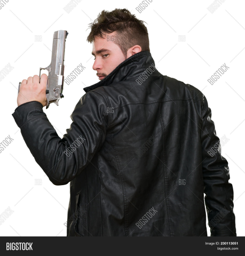

In [3]:
image = Image.open('human_weapon1.jpg')
# Create a PIL Image object from the opened image
pil_image = image.copy()
pil_image.to_thumb(256,256)

In [4]:
learn = load_learner('weapon_finder_model.pkl')

In [5]:
learn.predict(pil_image)

('human holding weapon', tensor(0), tensor([9.9999e-01, 1.4494e-05]))

In [6]:
categories = ('Human holding Weapon', 'Weapon')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))  # Convert probabilities to float


In [7]:

image = gr.Image(type="pil", label="Upload Image")  # Removed 'tool' and 'image_mode'
label = gr.Label()

examples = ['human_weapon1.jpg', 'weapon22.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://ec5a4908140c27f441.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
